In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib as mpl

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
first_digit = X.loc[0]

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [4]:
sdg_clf = SGDClassifier(random_state=42)
sdg_clf.fit(X_train_scaled, y_train)

SGDClassifier(random_state=42)

In [5]:
y_train_pred = cross_val_predict(
    sdg_clf, X_train_scaled, y_train, cv=3
)
conf_matrix = confusion_matrix(y_train, y_train_pred)

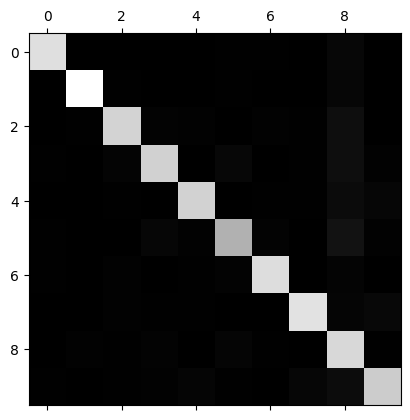

In [6]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

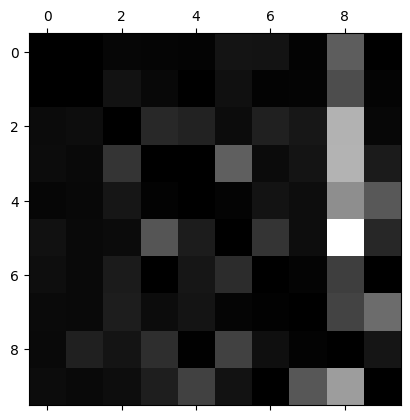

In [8]:
rows_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / rows_sums
np.fill_diagonal(norm_conf_matrix, 0)
plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)
plt.show()

In [ ]:
 # seems we need improve the classifier for 5s and 8s

In [15]:
# EXTRA
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

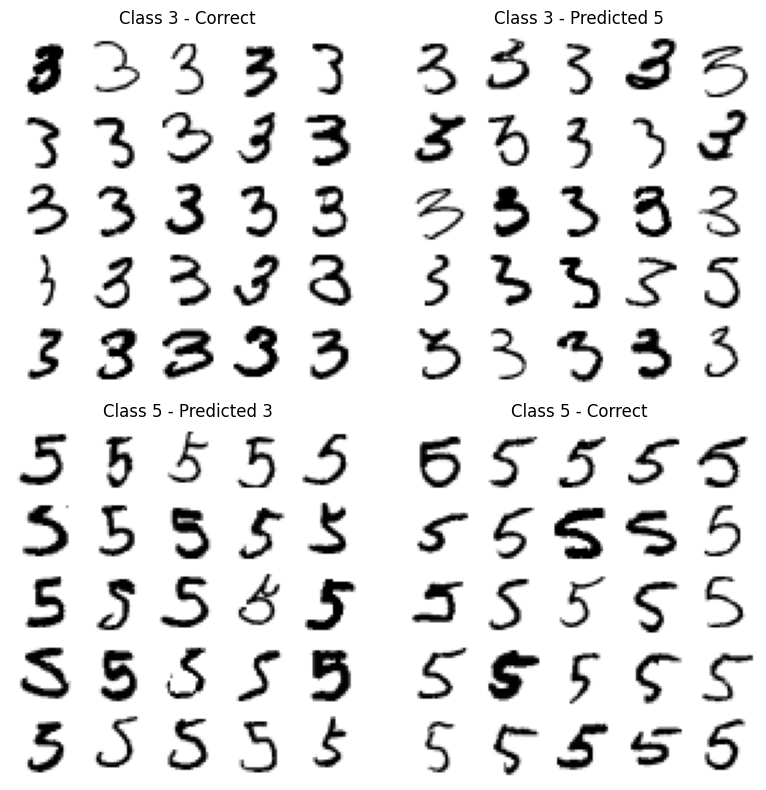

In [16]:
# manual error analysis
cl_a, cl_b = 3,5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=[8,8])
plt.subplot(2,2,1); plot_digits(X_aa[:25]); plt.axis('off'); plt.title(f'Class {cl_a} - Correct')
plt.subplot(2,2,2); plot_digits(X_ab[:25]); plt.axis('off'); plt.title(f'Class {cl_a} - Predicted {cl_b}')
plt.subplot(2,2,3); plot_digits(X_ba[:25]); plt.axis('off'); plt.title(f'Class {cl_b} - Predicted {cl_a}')
plt.subplot(2,2,4); plot_digits(X_bb[:25]); plt.axis('off'); plt.title(f'Class {cl_b} - Correct')
plt.tight_layout()
plt.show()